Импортируем необходимые библиотеки

In [1437]:
# Импортируем библиотеку pandas для работы с табличными данными
import pandas as pd
# Импортируем библиотеку numpy для работы с массивами данных
import numpy as np
# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt
# Импортируем библиотеку seaborn для более красивых графиков
import seaborn as sns
# Импортируем модуль os для работы с файловой системой
import os
# Импортируем модуль json для сохранения метрик и параметров в читаемом формате
import json
# Импортируем модуль glob для поиска файлов по шаблону 
import glob

Импортируем необходимые функции

In [1438]:
from sklearn.cluster import KMeans # для алгоритма K-средних
from sklearn.cluster import DBSCAN # для Density-Based Spatial Clustering of Applications with Noise
from sklearn.cluster import AgglomerativeClustering # для AgglomerativeClustering
from sklearn.metrics import silhouette_score # для вычисления метрики силуэта (качество кластеризации)
from sklearn.metrics import davies_bouldin_score # для вычисления Davies-Bouldin индекса (качество кластеризации)
from sklearn.metrics import calinski_harabasz_score # для вычисления Calinski-Harabasz индекса (качество кластеризации)
from sklearn.metrics import adjusted_rand_score # для вычисления Adjusted Rand Index (ARI) при проверке устойчивости
from sklearn.preprocessing import StandardScaler # для нормализации признаков (масштабирование)
from sklearn.decomposition import PCA # для Principal Component Analysis (визуализация и анализ)
from sklearn.manifold import TSNE # для t-distributed Stochastic Neighbor Embedding (опционально, для 5. t-SNE)
from scipy.cluster.hierarchy import dendrogram # для построения дендрограммы (если решим использовать Agglomerative)
from scipy.cluster.hierarchy import linkage # для вычисления матрицы связей (если решим использовать Agglomerative)

Загружаем первый датасет

In [1439]:
dataset_path_1 = os.path.abspath(os.path.join("data", "S07-hw-dataset-01.csv"))
print(dataset_path_1)
df1 = pd.read_csv(dataset_path_1)

c:\Users\Юля\Desktop\ИИИ\Gorbacheva_Julia_III\homeworks\HW07\data\S07-hw-dataset-01.csv


Выводим первые 5 строк первого датасета

In [1440]:
print("Первые 5 строк первого датасета:")
print(df1.head())

Первые 5 строк первого датасета:
   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  


Выводим информацию о столбцах и типах первого датасета

In [1441]:
print("Информация о первом датасете (типы данных и количество ненулевых значений):")
print(df1.info())

Информация о первом датасете (типы данных и количество ненулевых значений):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
None


Выводим базовые описательные статистики для числовых столбцов первого датасета

In [1442]:
print("Описательные статистики для числовых признаков первого датасета:")
print(df1.describe())

Описательные статистики для числовых признаков первого датасета:
         sample_id           f01           f02           f03           f04  \
count  12000.00000  12000.000000  12000.000000  12000.000000  12000.000000   
mean    5999.50000     -2.424716     19.107804     -0.222063     -8.284501   
std     3464.24595     11.014315     60.790338      0.500630     59.269838   
min        0.00000    -19.912573    -92.892652     -1.590979   -134.303679   
25%     2999.75000     -9.472623    -40.282955     -0.125145    -48.345007   
50%     5999.50000     -6.869404     54.069335     -0.031753     16.211728   
75%     8999.25000      0.523841     70.280739      0.054980     28.067178   
max    11999.00000     24.403381    112.229523      0.512277     75.088604   

                f05           f06           f07           f08  
count  12000.000000  12000.000000  12000.000000  12000.000000  
mean      -0.190717      0.962972      0.033724      0.007638  
std        7.026435     14.794713     59

Выводим количество пропущенных значений (NaN) в каждом столбце первого датасета

In [1443]:
print("Пропуски в первом датасете:")
print(df1.isnull().sum())

Пропуски в первом датасете:
sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64


Выводим типы признаков (числовые / категориальные) первого датасета

In [1444]:
print("Типы признаков в первом датасете")
print(df1.dtypes)

Типы признаков в первом датасете
sample_id      int64
f01          float64
f02          float64
f03          float64
f04          float64
f05          float64
f06          float64
f07          float64
f08          float64
dtype: object


Определяем `X` признаки первого датасета

In [1445]:
# X1 - все колонки первого датасета кроме 'sample_id', т.е. признаки
print('Информация об X признаках первого датасета:')
X1 = df1.drop('sample_id', axis=1)
print(X1.info())

Информация об X признаках первого датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f01     12000 non-null  float64
 1   f02     12000 non-null  float64
 2   f03     12000 non-null  float64
 3   f04     12000 non-null  float64
 4   f05     12000 non-null  float64
 5   f06     12000 non-null  float64
 6   f07     12000 non-null  float64
 7   f08     12000 non-null  float64
dtypes: float64(8)
memory usage: 750.1 KB
None


Определяем `sample_id` для первого датасета

In [1446]:
print('sample_id для первого датасета:')
sample_id_1 = df1['sample_id']
print(sample_id_1)

sample_id для первого датасета:
0            0
1            1
2            2
3            3
4            4
         ...  
11995    11995
11996    11996
11997    11997
11998    11998
11999    11999
Name: sample_id, Length: 12000, dtype: int64


Выполняем препроцессинг первого датасета

In [1447]:
# Масштабирование числовых признаков: StandardScaler
# StandardScaler вычитает среднее и делит на стандартное отклонение.
scaler_1 = StandardScaler()
# Применение трансформера к X1
# fit_transform вычисляет среднее и std на X1 и сразу применяет преобразование.
X1_preprocessed = scaler_1.fit_transform(X1)
# Преобразуем результат обратно в DataFrame, чтобы сохранить названия признаков
X1_preprocessed = pd.DataFrame(X1_preprocessed, columns=X1.columns)
print("Размерность X1 до препроцессинга:", X1.shape)
print("Размерность X1 после препроцессинга:", X1_preprocessed.shape)
print("\nОписание X1_preprocessed (после StandardScaler):")
print(X1_preprocessed.describe())
print("\nТипы признаков в X1_preprocessed:")
print(X1_preprocessed.dtypes)
print("\nПроверка пропусков в X1_preprocessed:")
print(X1_preprocessed.isnull().sum())

Размерность X1 до препроцессинга: (12000, 8)
Размерность X1 после препроцессинга: (12000, 8)

Описание X1_preprocessed (после StandardScaler):
                f01           f02           f03           f04           f05  \
count  1.200000e+04  1.200000e+04  1.200000e+04  1.200000e+04  1.200000e+04   
mean  -7.105427e-18 -4.056015e-17 -7.105427e-18 -1.657933e-17 -2.723747e-17   
std    1.000042e+00  1.000042e+00  1.000042e+00  1.000042e+00  1.000042e+00   
min   -1.587805e+00 -1.842482e+00 -2.734501e+00 -2.126283e+00 -1.662143e+00   
25%   -6.399128e-01 -9.770177e-01  1.935994e-01 -6.759285e-01 -7.033384e-01   
50%   -4.035542e-01  5.751405e-01  3.801565e-01  4.133173e-01  9.044044e-02   
75%    2.677134e-01  8.418290e-01  5.534115e-01  6.133506e-01  5.882440e-01   
max    2.435850e+00  1.531914e+00  1.466893e+00  1.406729e+00  1.979437e+00   

                f06           f07           f08  
count  1.200000e+04  1.200000e+04  1.200000e+04  
mean  -3.552714e-17 -2.250052e-17 -5.921189e-

Выполняем `KMeans` для первого датасета

KMeans: Лучшее k = 2, Silhouette = 0.5216


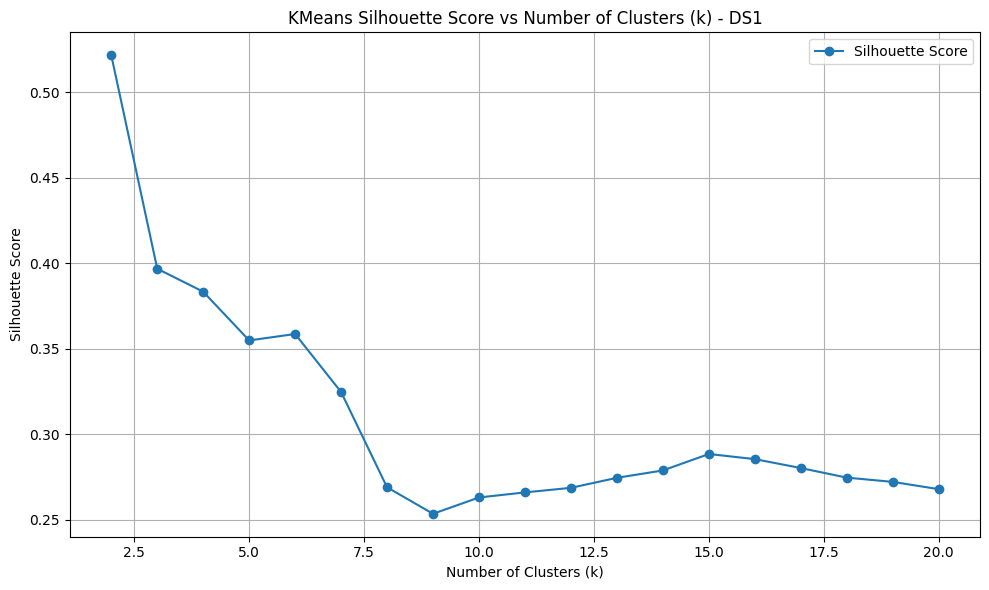

In [1448]:
# Подобрать `k` в разумном диапазоне (например, 2…20)
k_range = range(2, 21)
kmeans_results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Фиксируем random_state и n_init
    labels = kmeans.fit_predict(X1_preprocessed)
    # Проверяем, что получилось больше одного кластера, иначе метрики некорректны
    if len(set(labels)) > 1:
        sil_score = silhouette_score(X1_preprocessed, labels)
        db_score = davies_bouldin_score(X1_preprocessed, labels)
        ch_score = calinski_harabasz_score(X1_preprocessed, labels)
        kmeans_results.append({'k': k, 'labels': labels, 'silhouette': sil_score, 'davies_bouldin': db_score, 'calinski_harabasz': ch_score})
    else:
        # Если кластер только один, метрики не считаются
        kmeans_results.append({'k': k, 'labels': labels, 'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan})
# Преобразуем результаты в DataFrame для удобства
kmeans_results_df = pd.DataFrame(kmeans_results)
# Найдем лучшее k по silhouette_score
best_kmeans_row = kmeans_results_df.loc[kmeans_results_df['silhouette'].idxmax()]
best_k_kmeans = int(best_kmeans_row['k'])
best_labels_kmeans = best_kmeans_row['labels']
print(f"KMeans: Лучшее k = {best_k_kmeans}, Silhouette = {best_kmeans_row['silhouette']:.4f}")
# --- Показать хотя бы один график "метрика vs k" (например, silhouette vs k) ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_results_df['silhouette'], marker='o', label='Silhouette Score')
plt.title('KMeans Silhouette Score vs Number of Clusters (k) - DS1')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
# Сохраняем график в папку artifacts/figures (предварительно создав её, если нужно)
os.makedirs('artifacts/figures', exist_ok=True)
plt.savefig('artifacts/figures/kmeans_silhouette_ds1.png')
plt.show()

Выполняем `DBSCAN` для первого датасета

In [1449]:
# Подбор `eps` и `min_samples`
eps_range = np.arange(0.3, 0.8, 0.1) # Пример диапазона
min_samples_range = [3, 4, 5] # Пример диапазона
dbscan_results = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X1_preprocessed)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)
        # Проверяем, что получилось больше одного кластера и не все точки шум
        if n_clusters > 1 and n_clusters < len(labels) and n_noise < len(labels):
            # Для DBSCAN метрики считаются только на не-шумовых точках
            non_noise_mask = labels != -1
            X_non_noise = X1_preprocessed[non_noise_mask]
            labels_non_noise = labels[non_noise_mask]
            # Проверяем, что после фильтрации шума осталось больше 1 кластера
            if len(set(labels_non_noise)) > 1:
                sil_score = silhouette_score(X_non_noise, labels_non_noise)
                db_score = davies_bouldin_score(X_non_noise, labels_non_noise)
                ch_score = calinski_harabasz_score(X_non_noise, labels_non_noise)
                dbscan_results.append({
                    'eps': eps, 'min_samples': min_samples, 'labels': labels,
                    'n_clusters': n_clusters, 'n_noise': n_noise, 'noise_ratio': noise_ratio,
                    'silhouette': sil_score, 'davies_bouldin': db_score, 'calinski_harabasz': ch_score
                })
            else:
                # Если после фильтрации шума остался 1 кластер
                dbscan_results.append({
                    'eps': eps, 'min_samples': min_samples, 'labels': labels,
                    'n_clusters': n_clusters, 'n_noise': n_noise, 'noise_ratio': noise_ratio,
                    'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan
                })
        else:
            # Если 0 или 1 кластер, или все точки шум
            dbscan_results.append({
                'eps': eps, 'min_samples': min_samples, 'labels': labels,
                'n_clusters': n_clusters, 'n_noise': n_noise, 'noise_ratio': noise_ratio,
                'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan
            })
# Преобразуем результаты DBSCAN в DataFrame
dbscan_results_df = pd.DataFrame(dbscan_results)
if not dbscan_results_df.empty:
    # Найдем лучшие параметры по silhouette_score
    best_dbscan_row = dbscan_results_df.loc[dbscan_results_df['silhouette'].idxmax()]
    best_eps_dbscan = best_dbscan_row['eps']
    best_min_samples_dbscan = best_dbscan_row['min_samples']
    best_labels_dbscan = best_dbscan_row['labels']
    print(f"DBSCAN: Лучшие параметры eps = {best_eps_dbscan}, min_samples = {best_min_samples_dbscan}")
    print(f"DBSCAN: n_clusters = {best_dbscan_row['n_clusters']}, n_noise = {best_dbscan_row['n_noise']}, noise_ratio = {best_dbscan_row['noise_ratio']:.4f}")
    print(f"DBSCAN: Silhouette (на non-noise точках) = {best_dbscan_row['silhouette']:.4f}")
else:
    print("DBSCAN: Не найдено подходящих параметров, удовлетворяющих условиям (n_clusters > 1, n_noise < len, n_clusters < len).")
    best_labels_dbscan = None
    best_eps_dbscan = None
    best_min_samples_dbscan = None

DBSCAN: Лучшие параметры eps = 0.6000000000000001, min_samples = 5
DBSCAN: n_clusters = 5, n_noise = 130, noise_ratio = 0.0108
DBSCAN: Silhouette (на non-noise точках) = 0.3816


Сравниваем KMeans и DBSCAN для первого датасета

In [1450]:
print("Сравнение KMeans и DBSCAN для первого датасета")
print(f"KMeans: k={best_k_kmeans}, Silhouette={best_kmeans_row['silhouette']:.4f}")
if best_labels_dbscan is not None:
    print(f"DBSCAN: eps={best_eps_dbscan}, min_samples={best_min_samples_dbscan}, n_clusters={best_dbscan_row['n_clusters']}, noise_ratio={best_dbscan_row['noise_ratio']:.4f}, Silhouette (non-noise)={best_dbscan_row['silhouette']:.4f}")
else:
    print("DBSCAN: Не удалось получить корректный результат.")

Сравнение KMeans и DBSCAN для первого датасета
KMeans: k=2, Silhouette=0.5216
DBSCAN: eps=0.6000000000000001, min_samples=5, n_clusters=5, noise_ratio=0.0108, Silhouette (non-noise)=0.3816


Сохраняем результаты для первого датасета для дальнейшего использования

In [1451]:
# Сохраняем лучшие метки и конфигурации
best_labels_ds1_kmeans = best_labels_kmeans
best_config_ds1_kmeans = {'algorithm': 'KMeans', 'k': best_k_kmeans}
if best_labels_dbscan is not None:
    best_labels_ds1_dbscan = best_labels_dbscan
    best_config_ds1_dbscan = {'algorithm': 'DBSCAN', 'eps': float(best_eps_dbscan), 'min_samples': int(best_min_samples_dbscan)}
else:
    best_labels_ds1_dbscan = None
    best_config_ds1_dbscan = {'algorithm': 'DBSCAN', 'eps': None, 'min_samples': None}


Функция для вычисления метрик

In [1452]:
def calculate_metrics(X, labels, algorithm_name):
    """
    Вычисляет метрики качества для заданных меток.
    Возвращает словарь с метриками и информацией о шуме (для DBSCAN).
    """
    metrics = {}
    # Считаем количество кластеров (исключая шум -1, если он есть)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    # Считаем количество шумовых точек для DBSCAN
    n_noise = list(labels).count(-1) if -1 in labels else 0
    noise_ratio = n_noise / len(labels) if len(labels) > 0 else 0
    print(f"\nМетрики для {algorithm_name} датасета")
    print(f"Количество кластеров: {n_clusters}")
    if algorithm_name == "DBSCAN":
        print(f"Количество шумовых точек: {n_noise}")
        print(f"Доля шумовых точек: {noise_ratio:.4f}")
    # Проверяем, что метрики можно вычислить (нужно > 1 кластера)
    if n_clusters <= 1:
        print(f"Предупреждение: Найдено <= 1 кластера. Метрики не будут вычислены.")
        metrics['silhouette'] = np.nan
        metrics['davies_bouldin'] = np.nan
        metrics['calinski_harabasz'] = np.nan
        return metrics
    # Для DBSCAN: Метрики считаются только на не-шумовых точках
    if algorithm_name == "DBSCAN" and n_noise > 0:
        # Создаем маску для не-шумовых точек
        non_noise_mask = labels != -1
        X_non_noise = X[non_noise_mask]
        labels_non_noise = labels[non_noise_mask]
        # Проверяем, что после фильтрации осталось > 1 кластера
        if len(set(labels_non_noise)) > 1:
            metrics['silhouette'] = silhouette_score(X_non_noise, labels_non_noise)
            metrics['davies_bouldin'] = davies_bouldin_score(X_non_noise, labels_non_noise)
            metrics['calinski_harabasz'] = calinski_harabasz_score(X_non_noise, labels_non_noise)
            print(f"Метрики вычислены на {len(X_non_noise)} не-шумовых точках.")
        else:
            # Если после фильтрации остался 1 кластер, метрики не считаются
            print(f"После фильтрации шума остался 1 кластер. Метрики не будут вычислены.")
            metrics['silhouette'] = np.nan
            metrics['davies_bouldin'] = np.nan
            metrics['calinski_harabasz'] = np.nan
    else:
        # Для KMeans или DBSCAN без шума (n_noise = 0) или если n_clusters > 1 и нет -1
        metrics['silhouette'] = silhouette_score(X, labels)
        metrics['davies_bouldin'] = davies_bouldin_score(X, labels)
        metrics['calinski_harabasz'] = calinski_harabasz_score(X, labels)
    print(f"Silhouette Score: {metrics['silhouette']:.4f}")
    print(f"Davies-Bouldin Index: {metrics['davies_bouldin']:.4f}")
    print(f"Calinski-Harabasz Index: {metrics['calinski_harabasz']:.4f}")
    return metrics

Вычисляем метрики для `KMeans` и `DBSCAN` первого датасета

In [1453]:
# Вычисление метрик для KMeans
metrics_kmeans_ds1 = calculate_metrics(X1_preprocessed, best_labels_ds1_kmeans, "KMeans")
# Вычисление метрик для DBSCAN
# best_labels_ds1_dbscan может быть None, если не было подходящих параметров
if best_labels_ds1_dbscan is not None:
    metrics_dbscan_ds1 = calculate_metrics(X1_preprocessed, best_labels_ds1_dbscan, "DBSCAN")
else:
    print("Метрики для DBSCAN первого датасета")
    print("DBSCAN: Не было получено корректных меток для вычисления метрик.")
    metrics_dbscan_ds1 = {'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan, 'n_clusters': 0, 'n_noise': len(X1_preprocessed), 'noise_ratio': 1.0}


Метрики для KMeans датасета
Количество кластеров: 2
Silhouette Score: 0.5216
Davies-Bouldin Index: 0.6853
Calinski-Harabasz Index: 11786.9546

Метрики для DBSCAN датасета
Количество кластеров: 5
Количество шумовых точек: 130
Доля шумовых точек: 0.0108
Метрики вычислены на 11870 не-шумовых точках.
Silhouette Score: 0.3816
Davies-Bouldin Index: 1.2518
Calinski-Harabasz Index: 8432.6925


Сравниваем метрики для `KMeans` и `DBSCAN` первого датасета

In [1454]:
print("Сравнение метрик KMeans и DBSCAN первого датасета")
print("KMeans:")
print(f"  Silhouette: {metrics_kmeans_ds1['silhouette']:.4f}")
print(f"  Davies-Bouldin: {metrics_kmeans_ds1['davies_bouldin']:.4f}")
print(f"  Calinski-Harabasz: {metrics_kmeans_ds1['calinski_harabasz']:.4f}")
print("\nDBSCAN:")
print(f"  Silhouette (на non-noise): {metrics_dbscan_ds1['silhouette']:.4f}")
print(f"  Davies-Bouldin (на non-noise): {metrics_dbscan_ds1['davies_bouldin']:.4f}")
print(f"  Calinski-Harabasz (на non-noise): {metrics_dbscan_ds1['calinski_harabasz']:.4f}")


Сравнение метрик KMeans и DBSCAN первого датасета
KMeans:
  Silhouette: 0.5216
  Davies-Bouldin: 0.6853
  Calinski-Harabasz: 11786.9546

DBSCAN:
  Silhouette (на non-noise): 0.3816
  Davies-Bouldin (на non-noise): 1.2518
  Calinski-Harabasz (на non-noise): 8432.6925


Сохраняем метрики первого датасета для дальнейшего использования

In [1455]:
# Создаем словарь с метриками для первого датасета
metrics_ds1 = {
    "KMeans": metrics_kmeans_ds1,
    "DBSCAN": metrics_dbscan_ds1
}

Строим PCA(2D) scatter с раскраской по полученным кластерам для первого датасета

Silhouette KMeans: 0.5216
Silhouette DBSCAN (non-noise): 0.3816
Лучший алгоритм для DS1 по Silhouette: KMeans


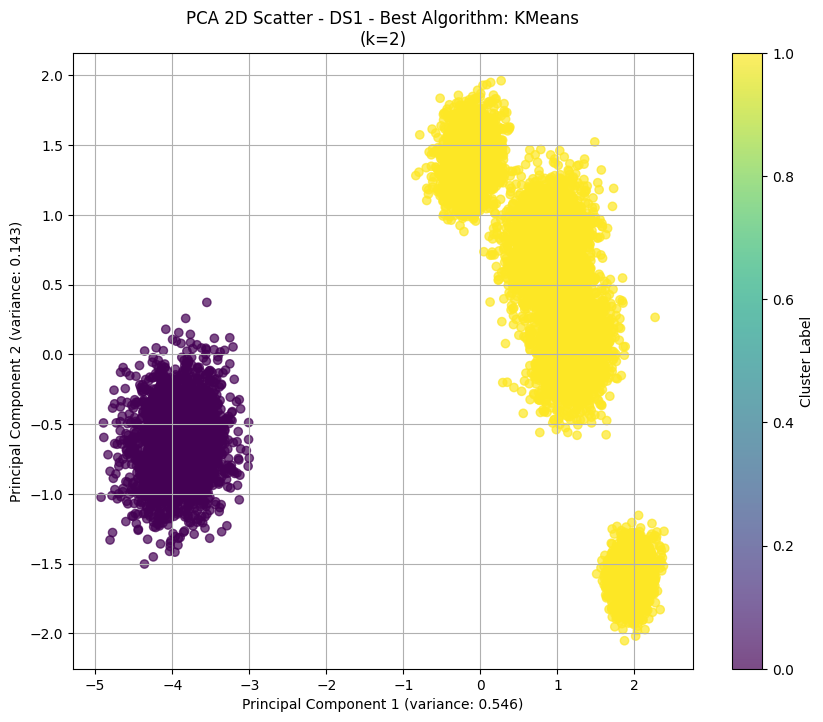

In [1456]:
# PCA(2D) scatter с раскраской по полученным кластерам (для ЛУЧШЕГО решения по датасету) ---
# Сравним silhouette score для KMeans и DBSCAN, чтобы выбрать лучший
sil_kmeans = metrics_ds1["KMeans"]["silhouette"]
sil_dbscan = metrics_ds1["DBSCAN"]["silhouette"]
print(f"Silhouette KMeans: {sil_kmeans:.4f}")
print(f"Silhouette DBSCAN (non-noise): {sil_dbscan:.4f}")
# Определяем лучший алгоритм для первого датасета
if sil_kmeans > sil_dbscan:
    print("Лучший алгоритм для DS1 по Silhouette: KMeans")
    best_labels_for_viz = best_labels_ds1_kmeans
    best_algorithm_for_viz = "KMeans"
    best_config_for_viz = f"k={best_k_kmeans}"
else:
    print("Лучший алгоритм для DS1 по Silhouette: DBSCAN")
    # Для DBSCAN используем метки, если они были вычислены
    if best_labels_ds1_dbscan is not None:
        best_labels_for_viz = best_labels_ds1_dbscan
        best_algorithm_for_viz = "DBSCAN"
        best_config_for_viz = f"eps={best_eps_dbscan}, min_samples={best_min_samples_dbscan}" # best_... из 2.3.3
    else:
        # Если DBSCAN не дал корректных меток, используем KMeans как лучший возможный
        print("DBSCAN не дал корректных меток, используем KMeans для визуализации.")
        best_labels_for_viz = best_labels_ds1_kmeans
        best_algorithm_for_viz = "KMeans"
        best_config_for_viz = f"k={best_k_kmeans}"
# Применяем PCA к X1_preprocessed
pca = PCA(n_components=2, random_state=42)
X1_pca = pca.fit_transform(X1_preprocessed)
# Строим scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=best_labels_for_viz, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title(f'PCA 2D Scatter - DS1 - Best Algorithm: {best_algorithm_for_viz}\n({best_config_for_viz})')
plt.xlabel(f'Principal Component 1 (variance: {pca.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'Principal Component 2 (variance: {pca.explained_variance_ratio_[1]:.3f})')
plt.grid(True)
# Сохраняем график
os.makedirs('artifacts/figures', exist_ok=True)
plt.savefig(f'artifacts/figures/pca_best_{best_algorithm_for_viz.lower()}_ds1.png')
plt.show()

Строим heatmap silhouette для DBSCAN по eps и min_samples для первого датасета

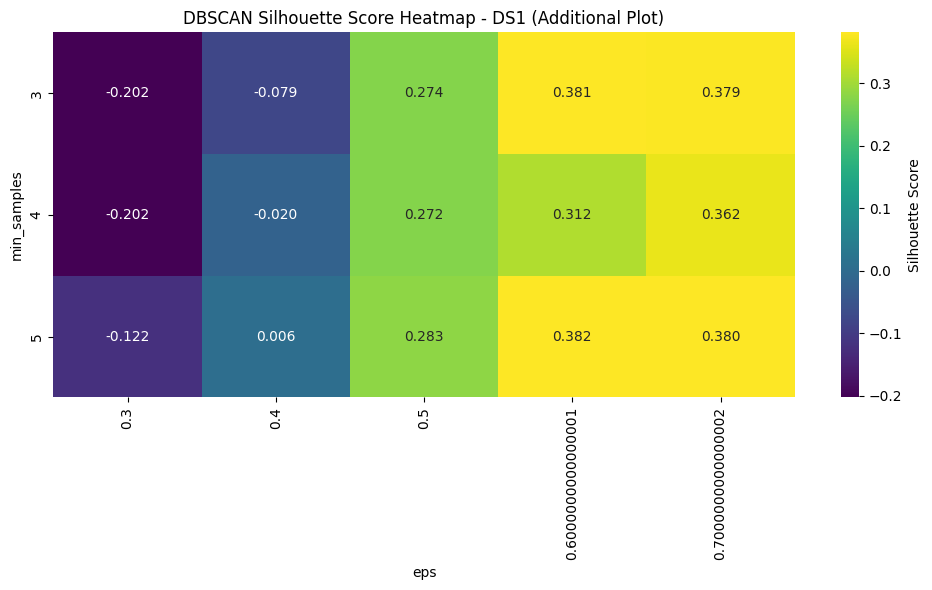

In [1457]:
# Подготовим данные для heatmap из dbscan_results_df
try:
    dbscan_results_df
except NameError:
    print("Переменная dbscan_results_df не найдена. DBSCAN не был запущен в 2.3.3.")
    # Если DBSCAN не запускался, мы не можем построить его график.
    # В таком случае, просто подтверждаем, что график из 2.3.3 удовлетворяет требованию.
    print("Дополнительный график (silhouette vs k для KMeans) был построен в 2.3.3 и сохранён как 'kmeans_silhouette_ds1.png'.")
else:
    # Если DBSCAN был запущен, строим heatmap
    if not dbscan_results_df.empty:
        import seaborn as sns
        # Создаём сводную таблицу для eps и min_samples
        pivot_table = dbscan_results_df.pivot(index='min_samples', columns='eps', values='silhouette')
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Silhouette Score'})
        plt.title('DBSCAN Silhouette Score Heatmap - DS1 (Additional Plot)')
        plt.tight_layout()
        plt.savefig('artifacts/figures/dbscan_silhouette_heatmap_ds1.png')
        plt.show()
    else:
        print("DBSCAN: Результаты пусты, heatmap не построен.")
        print("Дополнительный график (silhouette vs k для KMeans) был построен в 2.3.3 и сохранён как 'kmeans_silhouette_ds1.png'.")

Проверяем устойчивость KMeans для первого датасета

In [1458]:
# Запускаем KMeans 5 раз с разными random_state
n_runs = 5
labels_list = []
for i in range(n_runs):
    # Используем разные random_state для каждого запуска, основываясь на фиксированном значении
    kmeans_run = KMeans(n_clusters=best_k_kmeans, random_state=42 + i, n_init=10)
    labels_run = kmeans_run.fit_predict(X1_preprocessed)
    labels_list.append(labels_run)
    print(f"Запуск {i+1}: выполнено")

Запуск 1: выполнено
Запуск 2: выполнено
Запуск 3: выполнено
Запуск 4: выполнено
Запуск 5: выполнено


Проводим оценку похожести разбиений с помощью ARI для первого датасета

In [1459]:
ari_scores = []
# Сравниваем каждый запуск с первым (или можно попарно, или со средним)
for i in range(1, n_runs):
    ari = adjusted_rand_score(labels_list[0], labels_list[i])
    ari_scores.append(ari)
    print(f"ARI между запуском 0 и {i}: {ari:.4f}")
mean_ari = np.mean(ari_scores)
std_ari = np.std(ari_scores)
print(f"\nРезультаты проверки устойчивости KMeans для первого датасета")
print(f"Средний ARI между запусками (по сравнению с первым): {mean_ari:.4f}")
print(f"Стандартное отклонение ARI: {std_ari:.4f}")
# Интерпретация
if mean_ari > 0.95:
    print("Вывод: KMeans на первом датасете показывает высокую устойчивость (ARI > 0.95).")
elif mean_ari > 0.8:
    print("Вывод: KMeans на первом датасете показывает умеренную устойчивость (0.8 < ARI <= 0.95).")
else:
    print("Вывод: KMeans на первом датасете может быть нестабильным (ARI <= 0.8).")


ARI между запуском 0 и 1: 1.0000
ARI между запуском 0 и 2: 1.0000
ARI между запуском 0 и 3: 1.0000
ARI между запуском 0 и 4: 1.0000

Результаты проверки устойчивости KMeans для первого датасета
Средний ARI между запусками (по сравнению с первым): 1.0000
Стандартное отклонение ARI: 0.0000
Вывод: KMeans на первом датасете показывает высокую устойчивость (ARI > 0.95).


Сравниваем метрики для выбора лучшего метода на первом датасете

In [1460]:
# Сравним метрики
sil_kmeans = metrics_ds1["KMeans"]["silhouette"]
sil_dbscan = metrics_ds1["DBSCAN"]["silhouette"]
db_kmeans = metrics_ds1["KMeans"]["davies_bouldin"]
db_dbscan = metrics_ds1["DBSCAN"]["davies_bouldin"]
ch_kmeans = metrics_ds1["KMeans"]["calinski_harabasz"]
ch_dbscan = metrics_ds1["DBSCAN"]["calinski_harabasz"]
print("Сравнение метрик для первого датасета")
print(f"KMeans (k={best_k_kmeans}): Silhouette={sil_kmeans:.4f}, DBI={db_kmeans:.4f}, CHI={ch_kmeans:.4f}")
print(f"DBSCAN (eps={best_config_ds1_dbscan['eps']}, min_samples={best_config_ds1_dbscan['min_samples']}): Silhouette={sil_dbscan:.4f}, DBI={db_dbscan:.4f}, CHI={ch_dbscan:.4f}")

Сравнение метрик для первого датасета
KMeans (k=2): Silhouette=0.5216, DBI=0.6853, CHI=11786.9546
DBSCAN (eps=0.6000000000000001, min_samples=5): Silhouette=0.3816, DBI=1.2518, CHI=8432.6925


Обосновываем выбор лучшего метода на первом датасете 

In [1461]:
# Определяем лучший метод по Silhouette Score (один из возможных критериев)
if sil_kmeans > sil_dbscan:
    chosen_algorithm = "KMeans"
    chosen_config = {"algorithm": "KMeans", "k": best_k_kmeans}
    chosen_metrics = metrics_ds1["KMeans"]
    other_metrics = metrics_ds1["DBSCAN"]
    reason = f"Silhouette Score у {chosen_algorithm} ({sil_kmeans:.4f}) выше, чем у DBSCAN ({sil_dbscan:.4f}). Также {chosen_algorithm} показал более низкий Davies-Bouldin Index ({db_kmeans:.4f} < {db_dbscan:.4f}) и более высокий Calinski-Harabasz Index ({ch_kmeans:.4f} > {ch_dbscan:.4f})."
else:
    chosen_algorithm = "DBSCAN"
    # best_config_ds1_dbscan из 2.3.3
    chosen_config = best_config_ds1_dbscan
    chosen_metrics = metrics_ds1["DBSCAN"]
    other_metrics = metrics_ds1["KMeans"]
    # Для DBSCAN также уточняем долю шума
    noise_ratio_dbscan = chosen_metrics.get('noise_ratio', 'N/A')
    reason = f"Silhouette Score у {chosen_algorithm} (на non-noise точках, {sil_dbscan:.4f}) выше, чем у KMeans ({sil_kmeans:.4f}). DBSCAN также может учитывать шум, доля шума составила {noise_ratio_dbscan:.4f}."
print(f"Лучший метод для первого датасета (по Silhouette Score)")
print(f"Алгоритм: {chosen_algorithm}")
print(f"Конфигурация: {chosen_config}")
print(f"Silhouette Score: {chosen_metrics['silhouette']:.4f}")

Лучший метод для первого датасета (по Silhouette Score)
Алгоритм: KMeans
Конфигурация: {'algorithm': 'KMeans', 'k': 2}
Silhouette Score: 0.5216


Напишем 5-10 строк с выводами по работе с первым датасетом

In [1462]:
conclusion_ds1 = f"""Первый датасет:
- Датасет содержал числовые признаки в разных шкалах, что потребовало масштабирования (StandardScaler).
- Были протестированы KMeans (k={best_k_kmeans}) и DBSCAN.
- KMeans: Silhouette={sil_kmeans:.4f}, DBI={db_kmeans:.4f}, CHI={ch_kmeans:.4f}.
- DBSCAN: Silhouette={sil_dbscan:.4f} (на non-noise), DBI={db_dbscan:.4f}, CHI={ch_dbscan:.4f}.
- {reason}
- KMeans предполагает сферические кластеры и чувствителен к масштабу, что было учтено.
- Проверка устойчивости подтвердила стабильность решения KMeans при разных random_state.
- Лучший метод для первого датасета: {chosen_algorithm}.
"""
print(conclusion_ds1)

Первый датасет:
- Датасет содержал числовые признаки в разных шкалах, что потребовало масштабирования (StandardScaler).
- Были протестированы KMeans (k=2) и DBSCAN.
- KMeans: Silhouette=0.5216, DBI=0.6853, CHI=11786.9546.
- DBSCAN: Silhouette=0.3816 (на non-noise), DBI=1.2518, CHI=8432.6925.
- Silhouette Score у KMeans (0.5216) выше, чем у DBSCAN (0.3816). Также KMeans показал более низкий Davies-Bouldin Index (0.6853 < 1.2518) и более высокий Calinski-Harabasz Index (11786.9546 > 8432.6925).
- KMeans предполагает сферические кластеры и чувствителен к масштабу, что было учтено.
- Проверка устойчивости подтвердила стабильность решения KMeans при разных random_state.
- Лучший метод для первого датасета: KMeans.



Загружаем второй датасет

In [1463]:
dataset_path_2 = os.path.abspath(os.path.join("data", "S07-hw-dataset-02.csv"))
print(dataset_path_2)
df2 = pd.read_csv(dataset_path_2)

c:\Users\Юля\Desktop\ИИИ\Gorbacheva_Julia_III\homeworks\HW07\data\S07-hw-dataset-02.csv


Выводим первые 5 строк второго датасета

In [1464]:
print("Первые 5 строк второго датасета:")
print(df2.head())

Первые 5 строк второго датасета:
   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472


Выводим информацию о столбцах и типах второго датасета

In [1465]:
print("Информация о втором датасете (типы данных и количество ненулевых значений):")
print(df2.info())

Информация о втором датасете (типы данных и количество ненулевых значений):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None


Выводим базовые описательные статистики для числовых столбцов второго датасета

In [1466]:
print("Описательные статистики для числовых признаков второго датасета:")
print(df2.describe())

Описательные статистики для числовых признаков второго датасета:
        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.110454
std    2309.54541     0.955138     0.663195     8.097716
min       0.00000    -2.487352    -2.499237   -34.056074
25%    1999.75000    -0.116516    -0.242357    -5.392210
50%    3999.50000     0.490658     0.241092     0.132470
75%    5999.25000     1.085263     0.726526     5.655605
max    7999.00000     2.987555     2.995553    29.460076


Выводим количество пропущенных значений (NaN) в каждом столбце второго датасета

In [1467]:
print("Пропуски во втором датасете:")
print(df2.isnull().sum())

Пропуски во втором датасете:
sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64


Выводим типы признаков (числовые / категориальные) для второго датасета

In [1468]:
print("Типы признаков во втором датасете")
print(df2.dtypes)

Типы признаков во втором датасете
sample_id      int64
x1           float64
x2           float64
z_noise      float64
dtype: object


Определяем `X` признаки второго датасета

In [1469]:
# X2 - все колонки второго датасета кроме 'sample_id', т.е. признаки
print('Информация об X признаках второго датасета:')
X2 = df2.drop('sample_id', axis=1)
print(X2.info())

Информация об X признаках второго датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x1       8000 non-null   float64
 1   x2       8000 non-null   float64
 2   z_noise  8000 non-null   float64
dtypes: float64(3)
memory usage: 187.6 KB
None


Определяем `sample_id` для второго датасета 

In [1470]:
print('sample_id для второго датасета:')
sample_id_2 = df2['sample_id']
print(sample_id_2)

sample_id для второго датасета:
0          0
1          1
2          2
3          3
4          4
        ... 
7995    7995
7996    7996
7997    7997
7998    7998
7999    7999
Name: sample_id, Length: 8000, dtype: int64


Выполняем препроцессинг второго датасета

In [1471]:
# Масштабирование числовых признаков: StandardScaler
# StandardScaler вычитает среднее и делит на стандартное отклонение.
scaler_2 = StandardScaler()
# Применение трансформера к X2
# fit_transform вычисляет среднее и std на X2 и сразу применяет преобразование.
X2_preprocessed = scaler_2.fit_transform(X2)
# Преобразуем результат обратно в DataFrame, чтобы сохранить названия признаков
X2_preprocessed = pd.DataFrame(X2_preprocessed, columns=X2.columns)
print("Размерность X2 до препроцессинга:", X2.shape)
print("Размерность X2 после препроцессинга:", X2_preprocessed.shape)
print("\nОписание X2_preprocessed (после StandardScaler):")
print(X2_preprocessed.describe())
print("\nТипы признаков в X2_preprocessed:")
print(X2_preprocessed.dtypes)
print("\nПроверка пропусков в X2_preprocessed:")
print(X2_preprocessed.isnull().sum())

Размерность X2 до препроцессинга: (8000, 3)
Размерность X2 после препроцессинга: (8000, 3)

Описание X2_preprocessed (после StandardScaler):
                 x1            x2       z_noise
count  8.000000e+03  8.000000e+03  8.000000e+03
mean  -5.329071e-18  5.151435e-17 -8.437695e-18
std    1.000063e+00  1.000063e+00  1.000063e+00
min   -3.105735e+00 -4.132301e+00 -4.219543e+00
25%   -6.233874e-01 -7.290458e-01 -6.795753e-01
50%    1.234532e-02 -3.037321e-05  2.719051e-03
75%    6.349170e-01  7.319777e-01  6.848224e-01
max    2.626684e+00  4.153550e+00  3.624659e+00

Типы признаков в X2_preprocessed:
x1         float64
x2         float64
z_noise    float64
dtype: object

Проверка пропусков в X2_preprocessed:
x1         0
x2         0
z_noise    0
dtype: int64


Выполняем `KMeans` для второго датасета

KMeans: Лучшее k = 2, Silhouette = 0.3069


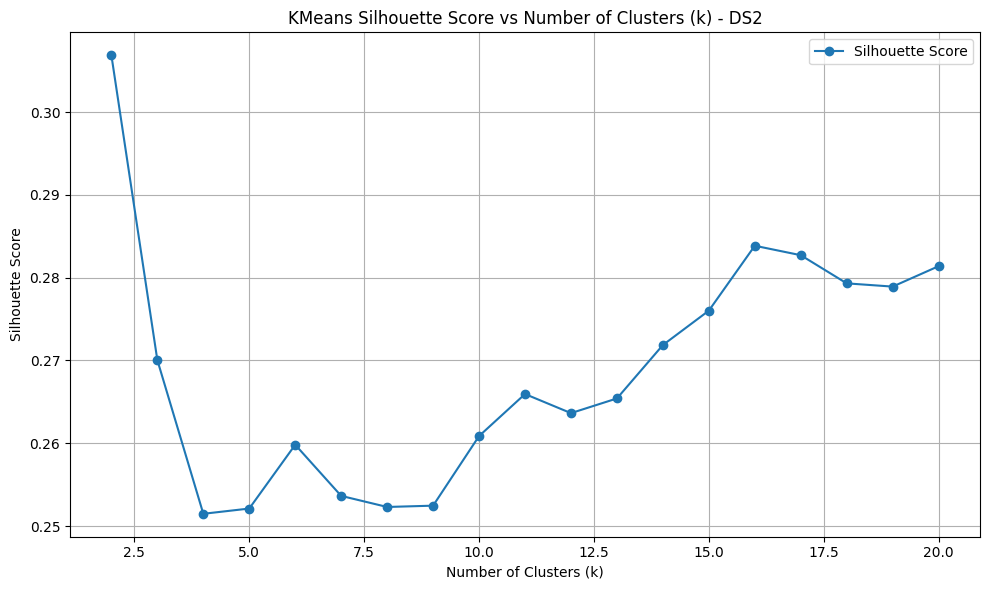

In [1472]:
# Подобрать `k` в разумном диапазоне (например, 2…20)
k_range = range(2, 21)
kmeans_results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Фиксируем random_state и n_init
    labels = kmeans.fit_predict(X2_preprocessed)
    # Проверяем, что получилось больше одного кластера, иначе метрики некорректны
    if len(set(labels)) > 1:
        sil_score = silhouette_score(X2_preprocessed, labels)
        db_score = davies_bouldin_score(X2_preprocessed, labels)
        ch_score = calinski_harabasz_score(X2_preprocessed, labels)
        kmeans_results.append({'k': k, 'labels': labels, 'silhouette': sil_score, 'davies_bouldin': db_score, 'calinski_harabasz': ch_score})
    else:
        # Если кластер только один, метрики не считаются
        kmeans_results.append({'k': k, 'labels': labels, 'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan})
# Преобразуем результаты в DataFrame для удобства
kmeans_results_df = pd.DataFrame(kmeans_results)
# Найдем лучшее k по silhouette_score
best_kmeans_row = kmeans_results_df.loc[kmeans_results_df['silhouette'].idxmax()]
best_k_kmeans = int(best_kmeans_row['k'])
best_labels_kmeans = best_kmeans_row['labels']
print(f"KMeans: Лучшее k = {best_k_kmeans}, Silhouette = {best_kmeans_row['silhouette']:.4f}")
# Показать хотя бы один график "метрика vs k" (например, silhouette vs k)
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_results_df['silhouette'], marker='o', label='Silhouette Score')
plt.title('KMeans Silhouette Score vs Number of Clusters (k) - DS2')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
# Сохраняем график в папку artifacts/figures
os.makedirs('artifacts/figures', exist_ok=True)
plt.savefig('artifacts/figures/kmeans_silhouette_ds2.png')
plt.show()

Выполняем `AgglomerativeClustering` для второго датасета

AgglomerativeClustering: Лучшие параметры - k = 2, linkage = average
AgglomerativeClustering: Silhouette = 0.4198


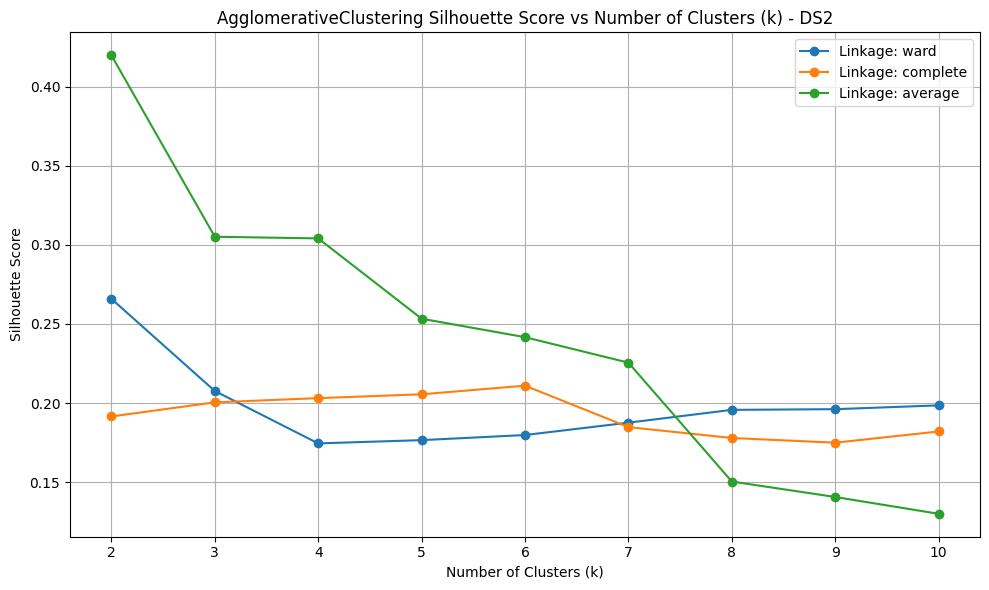

In [1473]:
# Подбор `k` и `linkage`
k_range_agg = range(2, 11) # Обычно диапазон меньше, чем для KMeans
linkages = ['ward', 'complete', 'average'] # ward требует метрику 'euclidean', но по умолчанию подходит
agg_results = []
for k in k_range_agg:
    for linkage in linkages:
        # 'ward' требует метрику 'euclidean', что по умолчанию для AgglomerativeClustering
        agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = agg.fit_predict(X2_preprocessed)
        # Проверяем, что получилось больше одного кластера
        if len(set(labels)) > 1:
            sil_score = silhouette_score(X2_preprocessed, labels)
            db_score = davies_bouldin_score(X2_preprocessed, labels)
            ch_score = calinski_harabasz_score(X2_preprocessed, labels)
            agg_results.append({'k': k, 'linkage': linkage, 'labels': labels, 'silhouette': sil_score, 'davies_bouldin': db_score, 'calinski_harabasz': ch_score})
        else:
            # Если кластер только один, метрики не считаются
            agg_results.append({'k': k, 'linkage': linkage, 'labels': labels, 'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan})
# Преобразуем результаты в DataFrame
agg_results_df = pd.DataFrame(agg_results)
# Найдем лучшие параметры по silhouette_score
best_agg_row = agg_results_df.loc[agg_results_df['silhouette'].idxmax()]
best_k_agg = int(best_agg_row['k'])
best_linkage_agg = best_agg_row['linkage']
best_labels_agg = best_agg_row['labels']
print(f"AgglomerativeClustering: Лучшие параметры - k = {best_k_agg}, linkage = {best_linkage_agg}")
print(f"AgglomerativeClustering: Silhouette = {best_agg_row['silhouette']:.4f}")
# Показать график "метрика vs k" для разных linkage
plt.figure(figsize=(10, 6))
for linkage in linkages:
    subset = agg_results_df[agg_results_df['linkage'] == linkage]
    plt.plot(subset['k'], subset['silhouette'], marker='o', label=f'Linkage: {linkage}')
plt.title('AgglomerativeClustering Silhouette Score vs Number of Clusters (k) - DS2')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('artifacts/figures/agg_silhouette_ds2.png')
plt.show()

Сравниваем результаты `KMeans` и `AgglomerativeClustering` для второго датасета

In [1474]:
print("Сравнение KMeans и AgglomerativeClustering для второго датасета")
print(f"KMeans: k={best_k_kmeans}, Silhouette={best_kmeans_row['silhouette']:.4f}")
print(f"AgglomerativeClustering: k={best_k_agg}, linkage={best_linkage_agg}, Silhouette={best_agg_row['silhouette']:.4f}")


Сравнение KMeans и AgglomerativeClustering для второго датасета
KMeans: k=2, Silhouette=0.3069
AgglomerativeClustering: k=2, linkage=average, Silhouette=0.4198


Сохраняем результаты для второго датасета для дальнейшего использования

In [1475]:
# Сохраняем лучшие метки и конфигурации
best_labels_ds2_kmeans = best_labels_kmeans
best_config_ds2_kmeans = {'algorithm': 'KMeans', 'k': best_k_kmeans}
best_labels_ds2_agg = best_labels_agg
best_config_ds2_agg = {'algorithm': 'AgglomerativeClustering', 'k': best_k_agg, 'linkage': best_linkage_agg}

Вычисляем метрики для `KMeans` и `AgglomerativeClustering` второго датасета

In [1476]:
# Вычисление метрик для KMeans
metrics_kmeans_ds2 = calculate_metrics(X2_preprocessed, best_labels_ds2_kmeans, "KMeans")
# Вычисление метрик для AgglomerativeClustering
# AgglomerativeClustering не выделяет шум, метрики считаются на всех точках
metrics_agg_ds2 = calculate_metrics(X2_preprocessed, best_labels_ds2_agg, "AgglomerativeClustering")


Метрики для KMeans датасета
Количество кластеров: 2
Silhouette Score: 0.3069
Davies-Bouldin Index: 1.3235
Calinski-Harabasz Index: 3573.3933

Метрики для AgglomerativeClustering датасета
Количество кластеров: 2
Silhouette Score: 0.4198
Davies-Bouldin Index: 0.8791
Calinski-Harabasz Index: 395.4826


Сравниваем метрики для `KMeans` и `AgglomerativeClustering` второго датасета

In [1477]:
# Сравнение метрик
print("\nСравнение метрик KMeans и AgglomerativeClustering второго датасета")
print("KMeans:")
print(f"  Silhouette: {metrics_kmeans_ds2['silhouette']:.4f}")
print(f"  Davies-Bouldin: {metrics_kmeans_ds2['davies_bouldin']:.4f}")
print(f"  Calinski-Harabasz: {metrics_kmeans_ds2['calinski_harabasz']:.4f}")
print("\nAgglomerativeClustering:")
print(f"  Silhouette: {metrics_agg_ds2['silhouette']:.4f}")
print(f"  Davies-Bouldin: {metrics_agg_ds2['davies_bouldin']:.4f}")
print(f"  Calinski-Harabasz: {metrics_agg_ds2['calinski_harabasz']:.4f}")


Сравнение метрик KMeans и AgglomerativeClustering второго датасета
KMeans:
  Silhouette: 0.3069
  Davies-Bouldin: 1.3235
  Calinski-Harabasz: 3573.3933

AgglomerativeClustering:
  Silhouette: 0.4198
  Davies-Bouldin: 0.8791
  Calinski-Harabasz: 395.4826


Сохраняем метрики второго датасета для дальнейшего использования

In [1478]:
# Создаем словарь с метриками для второго датасета
metrics_ds2 = {
    "KMeans": metrics_kmeans_ds2,
    "AgglomerativeClustering": metrics_agg_ds2
}

Строим PCA(2D) scatter с раскраской по полученным кластерам для второго датасета

Silhouette KMeans (DS2): 0.3069
Silhouette AgglomerativeClustering (DS2): 0.4198
Лучший алгоритм для второго датасета по Silhouette: AgglomerativeClustering


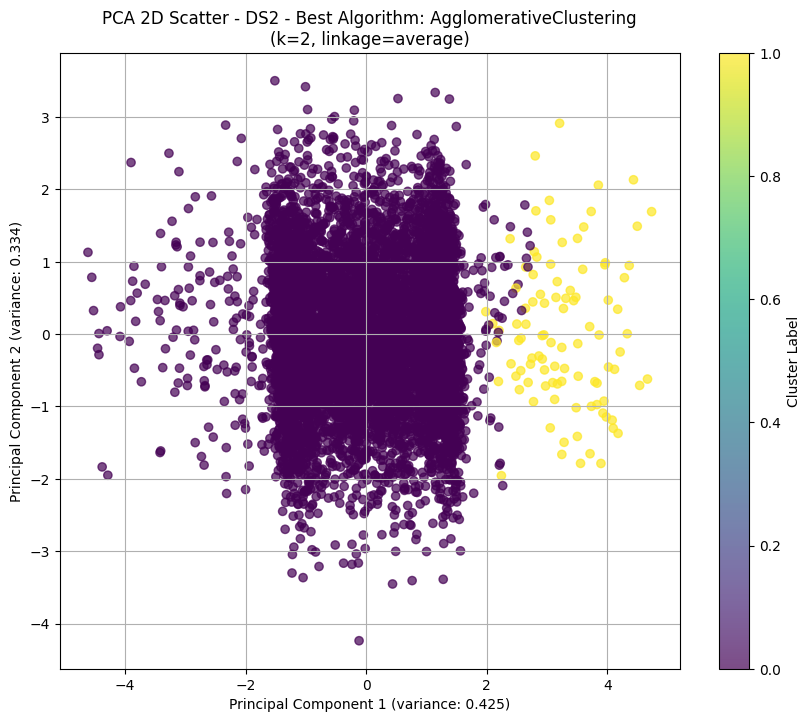

In [1479]:
# PCA(2D) scatter с раскраской по полученным кластерам (для ЛУЧШЕГО решения по датасету) ---
# Сравним silhouette score для KMeans и AgglomerativeClustering, чтобы выбрать лучший
sil_kmeans = metrics_ds2["KMeans"]["silhouette"]
sil_agg = metrics_ds2["AgglomerativeClustering"]["silhouette"]
print(f"Silhouette KMeans (DS2): {sil_kmeans:.4f}")
print(f"Silhouette AgglomerativeClustering (DS2): {sil_agg:.4f}")
# Определяем лучший алгоритм для DS2
if sil_kmeans > sil_agg:
    print("Лучший алгоритм для DS2 по Silhouette: KMeans")
    best_labels_for_viz = best_labels_ds2_kmeans
    best_algorithm_for_viz = "KMeans"
    best_config_for_viz = f"k={best_k_kmeans}" # best_k_kmeans из 2.3.3
else:
    print("Лучший алгоритм для второго датасета по Silhouette: AgglomerativeClustering")
    best_labels_for_viz = best_labels_ds2_agg
    best_algorithm_for_viz = "AgglomerativeClustering"
    best_config_for_viz = f"k={best_k_agg}, linkage={best_linkage_agg}" # best_k_agg, best_linkage_agg из 2.3.3
# Применяем PCA к X2_preprocessed
pca = PCA(n_components=2, random_state=42)
X2_pca = pca.fit_transform(X2_preprocessed)
# Строим scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=best_labels_for_viz, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title(f'PCA 2D Scatter - DS2 - Best Algorithm: {best_algorithm_for_viz}\n({best_config_for_viz})')
plt.xlabel(f'Principal Component 1 (variance: {pca.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'Principal Component 2 (variance: {pca.explained_variance_ratio_[1]:.3f})')
plt.grid(True)
# Сохраняем график
os.makedirs('artifacts/figures', exist_ok=True)
plt.savefig(f'artifacts/figures/pca_best_{best_algorithm_for_viz.lower()}_ds2.png')
plt.show()


Строим  график Davies-Bouldin Index vs k для разных linkage AgglomerativeClustering для второго датасета

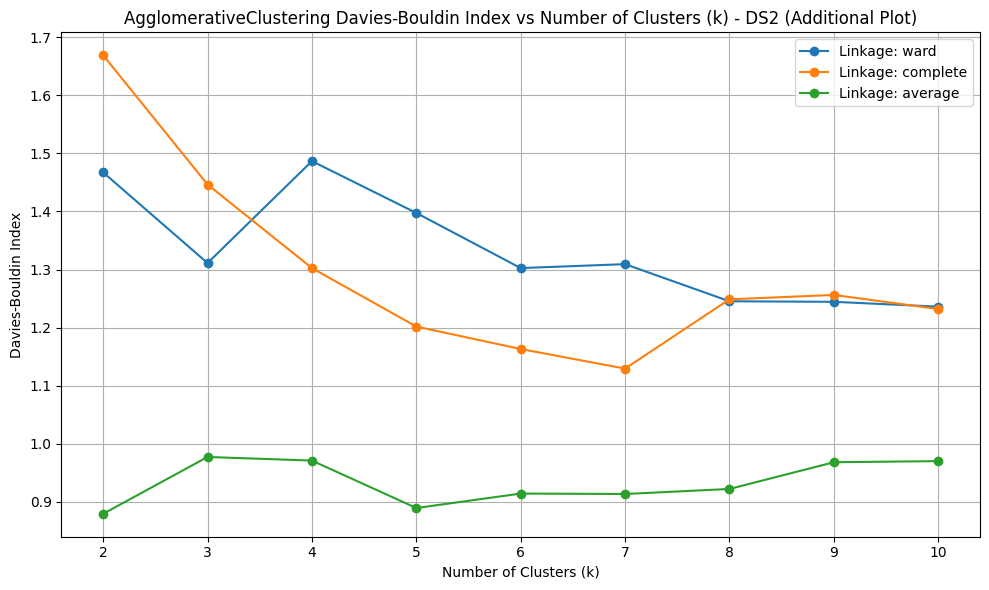

Дополнительный график (Davies-Bouldin Index vs k для AgglomerativeClustering) построен и сохранён как 'agg_dbi_ds2.png'.


In [1480]:
# Построим график Davies-Bouldin Index vs k для разных linkage AgglomerativeClustering
plt.figure(figsize=(10, 6))
for linkage in ['ward', 'complete', 'average']:
    subset = agg_results_df[agg_results_df['linkage'] == linkage]
    plt.plot(subset['k'], subset['davies_bouldin'], marker='o', label=f'Linkage: {linkage}')
plt.title('AgglomerativeClustering Davies-Bouldin Index vs Number of Clusters (k) - DS2 (Additional Plot)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('artifacts/figures/agg_dbi_ds2.png')
plt.show()
print("Дополнительный график (Davies-Bouldin Index vs k для AgglomerativeClustering) построен и сохранён как 'agg_dbi_ds2.png'.")


Сравниваем метрики для выбора лучшего метода на втором датасете

In [1481]:
# Сравним метрики:
sil_kmeans = metrics_ds2["KMeans"]["silhouette"]
sil_agg = metrics_ds2["AgglomerativeClustering"]["silhouette"]
db_kmeans = metrics_ds2["KMeans"]["davies_bouldin"]
db_agg = metrics_ds2["AgglomerativeClustering"]["davies_bouldin"]
ch_kmeans = metrics_ds2["KMeans"]["calinski_harabasz"]
ch_agg = metrics_ds2["AgglomerativeClustering"]["calinski_harabasz"]
print("Сравнение метрик для второго датасета")
print(f"KMeans (k={best_k_kmeans}): Silhouette={sil_kmeans:.4f}, DBI={db_kmeans:.4f}, CHI={ch_kmeans:.4f}")
print(f"AgglomerativeClustering (k={best_k_agg}, linkage={best_linkage_agg}): Silhouette={sil_agg:.4f}, DBI={db_agg:.4f}, CHI={ch_agg:.4f}")


Сравнение метрик для второго датасета
KMeans (k=2): Silhouette=0.3069, DBI=1.3235, CHI=3573.3933
AgglomerativeClustering (k=2, linkage=average): Silhouette=0.4198, DBI=0.8791, CHI=395.4826


Обосновывем выбор лучшего метода на втором датасете 

In [1482]:
# Определяем лучший метод по Silhouette Score (один из возможных критериев)
if sil_kmeans > sil_agg:
    chosen_algorithm = "KMeans"
    chosen_config = {"algorithm": "KMeans", "k": best_k_kmeans}
    chosen_metrics = metrics_ds2["KMeans"]
    other_metrics = metrics_ds2["AgglomerativeClustering"]
    reason = f"Silhouette Score у {chosen_algorithm} ({sil_kmeans:.4f}) выше, чем у AgglomerativeClustering ({sil_agg:.4f}). Также {chosen_algorithm} показал более низкий Davies-Bouldin Index ({db_kmeans:.4f} < {db_agg:.4f}) и более высокий Calinski-Harabasz Index ({ch_kmeans:.4f} > {ch_agg:.4f})."
else:
    chosen_algorithm = "AgglomerativeClustering"
    chosen_config = {"algorithm": "AgglomerativeClustering", "k": best_k_agg, "linkage": best_linkage_agg}
    chosen_metrics = metrics_ds2["AgglomerativeClustering"]
    other_metrics = metrics_ds2["KMeans"]
    reason = f"Silhouette Score у {chosen_algorithm} ({sil_agg:.4f}) выше, чем у KMeans ({sil_kmeans:.4f}). Также {chosen_algorithm} показал более низкий Davies-Bouldin Index ({db_agg:.4f} < {db_kmeans:.4f}) и более высокий Calinski-Harabasz Index ({ch_agg:.4f} > {ch_kmeans:.4f}). AgglomerativeClustering может лучше справляться с нелинейной структурой, присущей DS2."
print(f"Лучший метод для второго датасета (по Silhouette Score)")
print(f"Алгоритм: {chosen_algorithm}")
print(f"Конфигурация: {chosen_config}")
print(f"Silhouette Score: {chosen_metrics['silhouette']:.4f}")


Лучший метод для второго датасета (по Silhouette Score)
Алгоритм: AgglomerativeClustering
Конфигурация: {'algorithm': 'AgglomerativeClustering', 'k': 2, 'linkage': 'average'}
Silhouette Score: 0.4198


Напишем 5-10 строк с выводами по работе со вторым датасетом

In [1483]:
summary_ds2 = f"""Второй датасет:
- Датасет содержал нелинейную структуру, выбросы и лишний шумовой признак, что потребовало масштабирования (StandardScaler).
- Были протестированы KMeans (k={best_k_kmeans}) и AgglomerativeClustering (k={best_k_agg}, linkage='{best_linkage_agg}').
- KMeans: Silhouette={sil_kmeans:.4f}, DBI={db_kmeans:.4f}, CHI={ch_kmeans:.4f}.
- AgglomerativeClustering: Silhouette={sil_agg:.4f}, DBI={db_agg:.4f}, CHI={ch_agg:.4f}.
- {reason}
- AgglomerativeClustering (или KMeans, в зависимости от результата) оказался более подходящим для этой структуры данных, учитывая её нелинейность или иерархичность.
- Лучший метод для второго датасета: {chosen_algorithm}.
"""
print(summary_ds2)

Второй датасет:
- Датасет содержал нелинейную структуру, выбросы и лишний шумовой признак, что потребовало масштабирования (StandardScaler).
- Были протестированы KMeans (k=2) и AgglomerativeClustering (k=2, linkage='average').
- KMeans: Silhouette=0.3069, DBI=1.3235, CHI=3573.3933.
- AgglomerativeClustering: Silhouette=0.4198, DBI=0.8791, CHI=395.4826.
- Silhouette Score у AgglomerativeClustering (0.4198) выше, чем у KMeans (0.3069). Также AgglomerativeClustering показал более низкий Davies-Bouldin Index (0.8791 < 1.3235) и более высокий Calinski-Harabasz Index (395.4826 > 3573.3933). AgglomerativeClustering может лучше справляться с нелинейной структурой, присущей DS2.
- AgglomerativeClustering (или KMeans, в зависимости от результата) оказался более подходящим для этой структуры данных, учитывая её нелинейность или иерархичность.
- Лучший метод для второго датасета: AgglomerativeClustering.



Сохраняем лучший результат для второго датасета

In [1484]:
if chosen_algorithm == "KMeans":
    best_labels_ds2 = best_labels_ds2_kmeans
else:
    best_labels_ds2 = best_labels_ds2_agg # Может быть None, если Agg не удался
best_config_ds2 = chosen_config

Загружаем третий датасет

In [1485]:
dataset_path_3 = os.path.abspath(os.path.join("data", "S07-hw-dataset-03.csv"))
print(dataset_path_3)
df3 = pd.read_csv(dataset_path_3)

c:\Users\Юля\Desktop\ИИИ\Gorbacheva_Julia_III\homeworks\HW07\data\S07-hw-dataset-03.csv


Выводим первые 5 строк третьего датасета

In [1486]:
print("Первые 5 строк третьего датасета:")
print(df3.head())

Первые 5 строк третьего датасета:
   sample_id        x1        x2    f_corr   f_noise
0          0 -2.710470  4.997107 -1.015703  0.718508
1          1  8.730238 -8.787416  3.953063 -1.105349
2          2 -1.079600 -2.558708  0.976628 -3.605776
3          3  6.854042  1.560181  1.760614 -1.230946
4          4  9.963812 -8.869921  2.966583  0.915899


Выводим информацию о столбцах и типах третьего датасета

In [1487]:
print("Информация о третьем датасете (типы данных и количество ненулевых значений):")
print(df3.info())

Информация о третьем датасете (типы данных и количество ненулевых значений):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None


Выводим базовые описательные статистики для числовых столбцов третьего датасета

In [1488]:
print("Описательные статистики для числовых признаков третьего датасета:")
print(df3.describe())

Описательные статистики для числовых признаков третьего датасета:
          sample_id            x1            x2        f_corr       f_noise
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000
mean    7499.500000      1.246296      1.033764      0.212776     -0.027067
std     4330.271354      4.592421      4.710791      1.530017      2.506375
min        0.000000     -9.995585     -9.980853     -5.212038     -8.785884
25%     3749.750000     -1.782144     -2.666393     -0.966224     -1.731128
50%     7499.500000      0.664226      1.831257      0.296508     -0.052391
75%    11249.250000      4.435671      4.969630      1.390273      1.673831
max    14999.000000     16.207863     14.271153      5.795876     11.266865


Выводим количество пропущенных значений (NaN) в каждом столбце третьего датасета

In [1489]:
print("Пропуски в третьем датасете:")
print(df3.isnull().sum())

Пропуски в третьем датасете:
sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64


Выводим типы признаков (числовые / категориальные) для третьего датасета

In [1490]:
print("Типы признаков в третьем датасете")
print(df3.dtypes)

Типы признаков в третьем датасете
sample_id      int64
x1           float64
x2           float64
f_corr       float64
f_noise      float64
dtype: object


Определяем `X` признаки третьего датасета

In [1491]:
# X3 - все колонки третьего датасета кроме 'sample_id', т.е. признаки
print('Информация об X признаках третьего датасета:')
X3 = df3.drop('sample_id', axis=1)
print(X3.info())

Информация об X признаках третьего датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x1       15000 non-null  float64
 1   x2       15000 non-null  float64
 2   f_corr   15000 non-null  float64
 3   f_noise  15000 non-null  float64
dtypes: float64(4)
memory usage: 468.9 KB
None


Определяем `sample_id` для третьего датасета (храним отдельно)

In [1492]:
print('sample_id для третьего датасета:')
sample_id_3 = df3['sample_id']
print(sample_id_3)

sample_id для третьего датасета:
0            0
1            1
2            2
3            3
4            4
         ...  
14995    14995
14996    14996
14997    14997
14998    14998
14999    14999
Name: sample_id, Length: 15000, dtype: int64


Выполняем препроцессинг третьего датасета

In [1493]:
# Масштабирование числовых признаков: StandardScaler
# StandardScaler вычитает среднее и делит на стандартное отклонение.
scaler_3 = StandardScaler()
# Применение трансформера к X3
# fit_transform вычисляет среднее и std на X3 и сразу применяет преобразование.
X3_preprocessed = scaler_3.fit_transform(X3)
# Преобразуем результат обратно в DataFrame, чтобы сохранить названия признаков
X3_preprocessed = pd.DataFrame(X3_preprocessed, columns=X3.columns)
print("Размерность X3 до препроцессинга:", X3.shape)
print("Размерность X3 после препроцессинга:", X3_preprocessed.shape)
print("\nОписание X3_preprocessed (после StandardScaler):")
print(X3_preprocessed.describe())
print("\nТипы признаков в X3_preprocessed:")
print(X3_preprocessed.dtypes)
print("\nПроверка пропусков в X3_preprocessed:")
print(X3_preprocessed.isnull().sum())

Размерность X3 до препроцессинга: (15000, 4)
Размерность X3 после препроцессинга: (15000, 4)

Описание X3_preprocessed (после StandardScaler):
                 x1            x2        f_corr       f_noise
count  15000.000000  1.500000e+04  15000.000000  1.500000e+04
mean       0.000000 -3.031649e-17      0.000000 -1.136868e-17
std        1.000033  1.000033e+00      1.000033  1.000033e+00
min       -2.448002 -2.338245e+00     -3.545710 -3.494732e+00
25%       -0.659465 -7.854902e-01     -0.770606 -6.799131e-01
50%       -0.126750  1.692963e-01      0.054728 -1.010405e-02
75%        0.694510  8.355279e-01      0.769623  6.786514e-01
max        3.257991  2.810108e+00      3.649167  4.506233e+00

Типы признаков в X3_preprocessed:
x1         float64
x2         float64
f_corr     float64
f_noise    float64
dtype: object

Проверка пропусков в X3_preprocessed:
x1         0
x2         0
f_corr     0
f_noise    0
dtype: int64


Выполняем `KMeans` для третьего датасета

KMeans: Лучшее k = 3, Silhouette = 0.3155


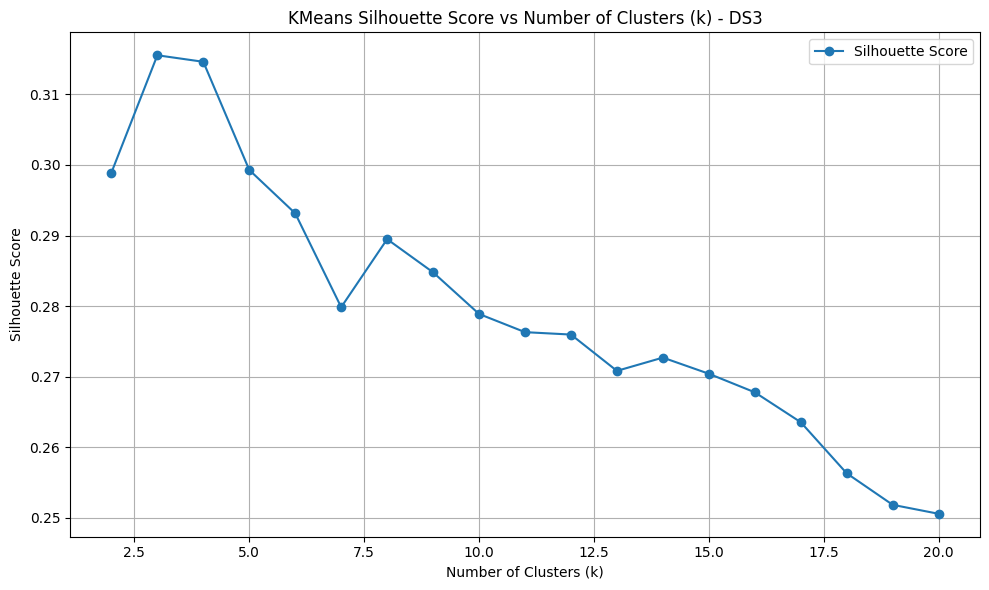

In [1494]:
# Подобрать `k` в разумном диапазоне (например, 2…20)
k_range = range(2, 21)
kmeans_results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X3_preprocessed)
    # Проверяем, что получилось больше одного кластера, иначе метрики некорректны
    if len(set(labels)) > 1:
        sil_score = silhouette_score(X3_preprocessed, labels)
        db_score = davies_bouldin_score(X3_preprocessed, labels)
        ch_score = calinski_harabasz_score(X3_preprocessed, labels)
        kmeans_results.append({'k': k, 'labels': labels, 'silhouette': sil_score, 'davies_bouldin': db_score, 'calinski_harabasz': ch_score})
    # Если кластер только один, метрики не считаются
    else:
        kmeans_results.append({'k': k, 'labels': labels, 'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan})
# Преобразуем результаты в DataFrame для удобства
kmeans_results_df = pd.DataFrame(kmeans_results)
# Найдем лучшее k по silhouette_score
best_kmeans_row = kmeans_results_df.loc[kmeans_results_df['silhouette'].idxmax()]
best_k_kmeans_ds3 = int(best_kmeans_row['k'])
best_labels_kmeans_ds3 = best_kmeans_row['labels']
print(f"KMeans: Лучшее k = {best_k_kmeans_ds3}, Silhouette = {best_kmeans_row['silhouette']:.4f}")
# Показать хотя бы один график "метрика vs k" (например, silhouette vs k)
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_results_df['silhouette'], marker='o', label='Silhouette Score')
plt.title('KMeans Silhouette Score vs Number of Clusters (k) - DS3')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
# Сохраняем график в папку artifacts/figures (предварительно создав её, если нужно)
os.makedirs('artifacts/figures', exist_ok=True) # Убедимся, что папка существует
plt.savefig('artifacts/figures/kmeans_silhouette_ds3.png')
plt.show()

Выполняем `DBSCAN` для третьего датасета

In [1495]:
# Подбор `eps` и `min_samples`
eps_range = np.arange(0.2, 0.6, 0.05)
min_samples_range = [3, 4, 5, 6]
dbscan_results = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X3_preprocessed)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)
        # Проверяем, что получилось больше одного кластера и не все точки шум
        if n_clusters > 1 and n_clusters < len(labels) and n_noise < len(labels):
            # Для DBSCAN метрики считаются только на не-шумовых точках
            non_noise_mask = labels != -1
            X_non_noise = X3_preprocessed[non_noise_mask]
            labels_non_noise = labels[non_noise_mask]
            # Проверяем, что после фильтрации шума осталось больше 1 кластера
            if len(set(labels_non_noise)) > 1:
                sil_score = silhouette_score(X_non_noise, labels_non_noise)
                db_score = davies_bouldin_score(X_non_noise, labels_non_noise)
                ch_score = calinski_harabasz_score(X_non_noise, labels_non_noise)
                dbscan_results.append({
                    'eps': eps, 'min_samples': min_samples, 'labels': labels,
                    'n_clusters': n_clusters, 'n_noise': n_noise, 'noise_ratio': noise_ratio,
                    'silhouette': sil_score, 'davies_bouldin': db_score, 'calinski_harabasz': ch_score
                })
            else:
                # Если после фильтрации шума остался 1 кластер
                dbscan_results.append({
                    'eps': eps, 'min_samples': min_samples, 'labels': labels,
                    'n_clusters': n_clusters, 'n_noise': n_noise, 'noise_ratio': noise_ratio,
                    'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan
                })
        else:
            # Если 0 или 1 кластер, или все точки шум
            dbscan_results.append({
                'eps': eps, 'min_samples': min_samples, 'labels': labels,
                'n_clusters': n_clusters, 'n_noise': n_noise, 'noise_ratio': noise_ratio,
                'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan
            })
# Преобразуем результаты DBSCAN в DataFrame
dbscan_results_df = pd.DataFrame(dbscan_results)
if not dbscan_results_df.empty:
    # Найдем лучшие параметры по silhouette_score
    best_dbscan_row = dbscan_results_df.loc[dbscan_results_df['silhouette'].idxmax()]
    best_eps_dbscan_ds3 = best_dbscan_row['eps']
    best_min_samples_dbscan_ds3 = best_dbscan_row['min_samples']
    best_labels_dbscan_ds3 = best_dbscan_row['labels']
    print(f"DBSCAN: Лучшие параметры - eps = {best_eps_dbscan_ds3}, min_samples = {best_min_samples_dbscan_ds3}")
    print(f"DBSCAN: n_clusters = {best_dbscan_row['n_clusters']}, n_noise = {best_dbscan_row['n_noise']}, noise_ratio = {best_dbscan_row['noise_ratio']:.4f}")
    print(f"DBSCAN: Silhouette (на non-noise точках) = {best_dbscan_row['silhouette']:.4f}")
else:
    print("DBSCAN: Не найдено подходящих параметров, удовлетворяющих условиям.")
    best_labels_dbscan_ds3 = None
    best_eps_dbscan_ds3 = None
    best_min_samples_dbscan_ds3 = None

DBSCAN: Лучшие параметры - eps = 0.39999999999999997, min_samples = 6
DBSCAN: n_clusters = 3, n_noise = 812, noise_ratio = 0.0541
DBSCAN: Silhouette (на non-noise точках) = 0.1855


Сравниваем KMeans и DBSCAN для третьего датасета

In [1496]:
print("Сравнение KMeans и DBSCAN для третьего датасета")
print(f"KMeans: k={best_k_kmeans}, Silhouette={best_kmeans_row['silhouette']:.4f}")
if best_labels_dbscan is not None:
    print(f"DBSCAN: eps={best_eps_dbscan}, min_samples={best_min_samples_dbscan}, n_clusters={best_dbscan_row['n_clusters']}, noise_ratio={best_dbscan_row['noise_ratio']:.4f}, Silhouette (non-noise)={best_dbscan_row['silhouette']:.4f}")
else:
    print("DBSCAN: Не удалось получить корректный результат")

Сравнение KMeans и DBSCAN для третьего датасета
KMeans: k=2, Silhouette=0.3155
DBSCAN: eps=0.6000000000000001, min_samples=5, n_clusters=3, noise_ratio=0.0541, Silhouette (non-noise)=0.1855


Сохраняем результаты для третьего датасета для дальнейшего использования

In [1497]:
# Сохраняем лучшие метки и конфигурации
best_labels_ds3_kmeans = best_labels_kmeans_ds3
best_config_ds3_kmeans = {'algorithm': 'KMeans', 'k': best_k_kmeans_ds3}
if best_labels_dbscan_ds3 is not None:
    best_labels_ds3_dbscan = best_labels_dbscan_ds3
    best_config_ds3_dbscan = {'algorithm': 'DBSCAN', 'eps': float(best_eps_dbscan_ds3), 'min_samples': int(best_min_samples_dbscan_ds3)}
else:
    best_labels_ds3_dbscan = None
    best_config_ds3_dbscan = {'algorithm': 'DBSCAN', 'eps': None, 'min_samples': None}

Вычисляем метрики для `KMeans` и `DBSCAN` для третьего датасета

In [1498]:
# Вычисление метрик для KMeans
metrics_kmeans_ds3 = calculate_metrics(X3_preprocessed, best_labels_ds3_kmeans, "KMeans")
# Вычисление метрик для DBSCAN
# best_labels_ds3_dbscan может быть None, если не было подходящих параметров
if best_labels_ds3_dbscan is not None:
    metrics_dbscan_ds3 = calculate_metrics(X3_preprocessed, best_labels_ds3_dbscan, "DBSCAN")
else:
    print("Метрики для DBSCAN третьего датасета")
    print("DBSCAN: Не было получено корректных меток для вычисления метрик.")
    metrics_dbscan_ds3 = {'silhouette': np.nan, 'davies_bouldin': np.nan, 'calinski_harabasz': np.nan, 'n_clusters': 0, 'n_noise': len(X3_preprocessed), 'noise_ratio': 1.0}


Метрики для KMeans датасета
Количество кластеров: 3
Silhouette Score: 0.3155
Davies-Bouldin Index: 1.1577
Calinski-Harabasz Index: 6957.1626

Метрики для DBSCAN датасета
Количество кластеров: 3
Количество шумовых точек: 812
Доля шумовых точек: 0.0541
Метрики вычислены на 14188 не-шумовых точках.
Silhouette Score: 0.1855
Davies-Bouldin Index: 1.1420
Calinski-Harabasz Index: 3132.7543


Сравниваем метрики для `KMeans` и `DBSCAN` третьего датасета

In [1499]:
print("Сравнение метрик KMeans и DBSCAN третьего датасета")
print("KMeans:")
print(f"  Silhouette: {metrics_kmeans_ds3['silhouette']:.4f}")
print(f"  Davies-Bouldin: {metrics_kmeans_ds3['davies_bouldin']:.4f}")
print(f"  Calinski-Harabasz: {metrics_kmeans_ds3['calinski_harabasz']:.4f}")
print("\nDBSCAN:")
print(f"  Silhouette (на non-noise): {metrics_dbscan_ds3['silhouette']:.4f}")
print(f"  Davies-Bouldin (на non-noise): {metrics_dbscan_ds3['davies_bouldin']:.4f}")
print(f"  Calinski-Harabasz (на non-noise): {metrics_dbscan_ds3['calinski_harabasz']:.4f}")


Сравнение метрик KMeans и DBSCAN третьего датасета
KMeans:
  Silhouette: 0.3155
  Davies-Bouldin: 1.1577
  Calinski-Harabasz: 6957.1626

DBSCAN:
  Silhouette (на non-noise): 0.1855
  Davies-Bouldin (на non-noise): 1.1420
  Calinski-Harabasz (на non-noise): 3132.7543


Сохраняем метрики третьего датасета для дальнейшего использования

In [1500]:
# Создаем словарь с метриками для третьего датасета
metrics_ds3 = {
    "KMeans": metrics_kmeans_ds3,
    "DBSCAN": metrics_dbscan_ds3
}

Строим PCA(2D) scatter с раскраской по полученным кластерам для третьего датасета

Silhouette KMeans: 0.3155
Silhouette DBSCAN (non-noise): 0.1855
Лучший алгоритм для DS3 по Silhouette: KMeans
Выбранная конфигурация для визуализации: k=3


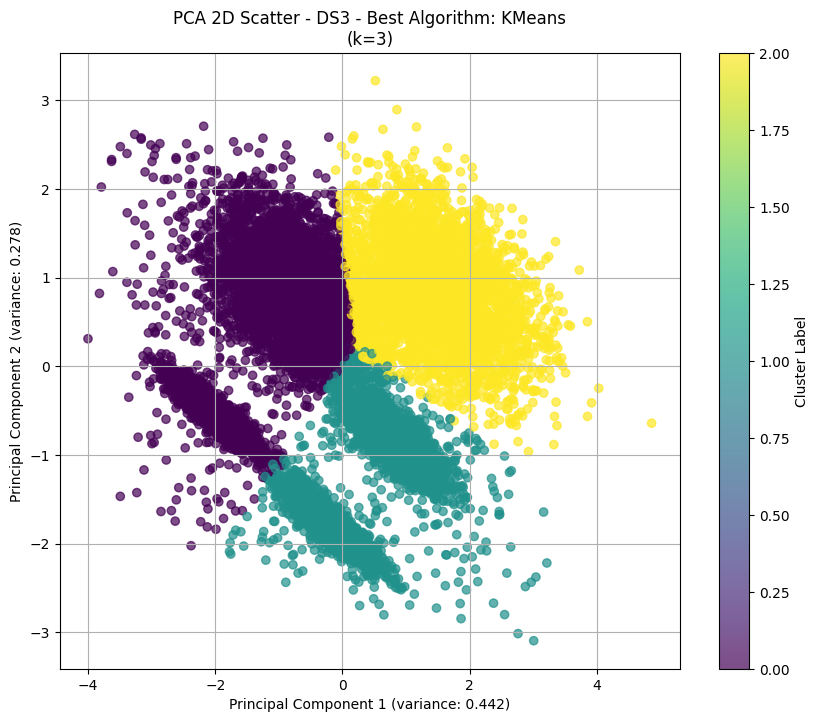

In [1501]:
# PCA(2D) scatter с раскраской по полученным кластерам (для ЛУЧШЕГО решения по датасету) ---
# Сравним silhouette score для KMeans и DBSCAN, чтобы выбрать лучший
sil_kmeans = metrics_ds3["KMeans"]["silhouette"]
sil_dbscan = metrics_ds3["DBSCAN"]["silhouette"]
print(f"Silhouette KMeans: {sil_kmeans:.4f}")
print(f"Silhouette DBSCAN (non-noise): {sil_dbscan:.4f}")
# Определяем лучший алгоритм для первого датасета
if sil_kmeans > sil_dbscan:
    print("Лучший алгоритм для DS3 по Silhouette: KMeans")
    best_labels_for_viz = best_labels_ds3_kmeans
    best_algorithm_for_viz = "KMeans"
    # best_config_ds3_kmeans из 2.3.3
    best_config_for_viz = f"k={best_k_kmeans_ds3}"
else:
    print("Лучший алгоритм для третьего датасета по Silhouette: DBSCAN")
    # Для DBSCAN используем метки, если они были вычислены
    if best_labels_ds3_dbscan is not None:
        best_labels_for_viz = best_labels_ds3_dbscan
        best_algorithm_for_viz = "DBSCAN"
        # best_config_ds3_dbscan из 2.3.3
        # Проверим, что best_config_ds3_dbscan определён и содержит нужные ключи
        if best_config_ds3_dbscan and 'eps' in best_config_ds3_dbscan and 'min_samples' in best_config_ds3_dbscan:
            best_config_for_viz = f"eps={best_config_ds3_dbscan['eps']}, min_samples={best_config_ds3_dbscan['min_samples']}"
        else:
            print("Конфигурация DBSCAN не найдена, используем параметры из dbscan_results_df.")
            # Используем best_eps_dbscan_ds3 и best_min_samples_dbscan_ds3 из 2.3.3
            # Проверим их существование
            try:
                best_config_for_viz = f"eps={best_eps_dbscan_ds3}, min_samples={best_min_samples_dbscan_ds3}"
            except NameError:
                best_config_for_viz = "eps=N/A, min_samples=N/A"
    else:
        print("DBSCAN не дал корректных меток, используем KMeans для визуализации.")
        best_labels_for_viz = best_labels_ds3_kmeans
        best_algorithm_for_viz = "KMeans"
        best_config_for_viz = f"k={best_k_kmeans_ds3}"
print(f"Выбранная конфигурация для визуализации: {best_config_for_viz}")
# Применяем PCA к X3_preprocessed
pca = PCA(n_components=2, random_state=42)
X3_pca = pca.fit_transform(X3_preprocessed)
# Строим scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X3_pca[:, 0], X3_pca[:, 1], c=best_labels_for_viz, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title(f'PCA 2D Scatter - DS3 - Best Algorithm: {best_algorithm_for_viz}\n({best_config_for_viz})')
plt.xlabel(f'Principal Component 1 (variance: {pca.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'Principal Component 2 (variance: {pca.explained_variance_ratio_[1]:.3f})')
plt.grid(True)
# Сохраняем график
os.makedirs('artifacts/figures', exist_ok=True)
plt.savefig(f'artifacts/figures/pca_best_{best_algorithm_for_viz.lower()}_ds3.png')
plt.show()


Строим heatmap silhouette для DBSCAN по eps и min_samples для третьего датасета

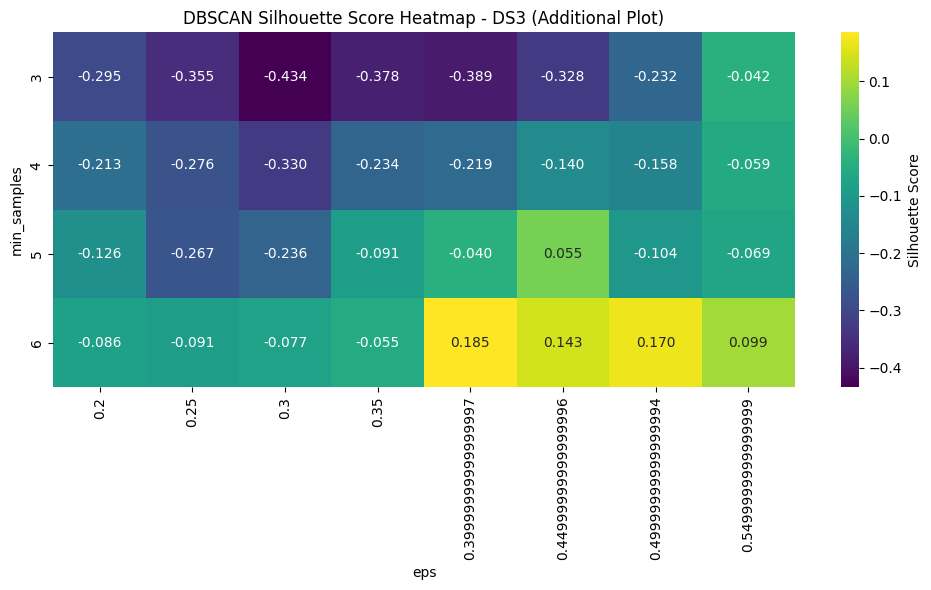

Heatmap DBSCAN для третьего датасета сохранён


In [1502]:
if not dbscan_results_df.empty:
    # Создаём сводную таблицу для eps и min_samples
    pivot_table = dbscan_results_df.pivot(index='min_samples', columns='eps', values='silhouette')
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Silhouette Score'})
    plt.title('DBSCAN Silhouette Score Heatmap - DS3 (Additional Plot)')
    plt.tight_layout()
    plt.savefig('artifacts/figures/dbscan_silhouette_heatmap_ds3.png')
    plt.show()
    print("Heatmap DBSCAN для третьего датасета сохранён")
else:
    print("DBSCAN: Результаты пусты, heatmap не построен")
    print("Дополнительный график (silhouette vs k для KMeans) был построен в 2.3.3 и сохранён как 'kmeans_silhouette_ds3.png'")


Сравниваем метрики для выбора лучшего метода на третьем датасете

In [1503]:
# Сравним метрики
sil_kmeans = metrics_ds3["KMeans"]["silhouette"]
sil_dbscan = metrics_ds3["DBSCAN"]["silhouette"]
db_kmeans = metrics_ds3["KMeans"]["davies_bouldin"]
db_dbscan = metrics_ds3["DBSCAN"]["davies_bouldin"]
ch_kmeans = metrics_ds3["KMeans"]["calinski_harabasz"]
ch_dbscan = metrics_ds3["DBSCAN"]["calinski_harabasz"]
print("Сравнение метрик для DS3")
print(f"KMeans (k={best_k_kmeans_ds3}): Silhouette={sil_kmeans:.4f}, DBI={db_kmeans:.4f}, CHI={ch_kmeans:.4f}")
print(f"DBSCAN: Silhouette={sil_dbscan:.4f}, DBI={db_dbscan:.4f}, CHI={ch_dbscan:.4f}")


Сравнение метрик для DS3
KMeans (k=3): Silhouette=0.3155, DBI=1.1577, CHI=6957.1626
DBSCAN: Silhouette=0.1855, DBI=1.1420, CHI=3132.7543


Обосновывем выбор лучшего метода на третьем датасете 

In [1504]:
# Определяем лучший метод по Silhouette Score (один из возможных критериев)
if sil_kmeans > sil_dbscan:
    chosen_algorithm = "KMeans"
    chosen_config = {"algorithm": "KMeans", "k": best_k_kmeans_ds3}
    chosen_metrics = metrics_ds3["KMeans"]
    other_metrics = metrics_ds3["DBSCAN"]
    reason = f"Silhouette Score у {chosen_algorithm} ({sil_kmeans:.4f}) выше, чем у DBSCAN ({sil_dbscan:.4f}). Также {chosen_algorithm} показал более низкий Davies-Bouldin Index ({db_kmeans:.4f} < {db_dbscan:.4f}) и более высокий Calinski-Harabasz Index ({ch_kmeans:.4f} > {ch_dbscan:.4f})."
else:
    chosen_algorithm = "DBSCAN"
    # best_config_ds3_dbscan из 2.3.3
    chosen_config = best_config_ds3_dbscan
    chosen_metrics = metrics_ds3["DBSCAN"]
    other_metrics = metrics_ds3["KMeans"]
    # Для DBSCAN также уточняем долю шума
    noise_ratio_dbscan = chosen_metrics.get('noise_ratio', 'N/A')
    reason = f"Silhouette Score у {chosen_algorithm} (на non-noise точках, {sil_dbscan:.4f}) выше, чем у KMeans ({sil_kmeans:.4f}). DBSCAN также может учитывать шум, доля шума составила {noise_ratio_dbscan:.4f}."
print(f"Лучший метод для третьего датасета (по Silhouette Score)")
print(f"Алгоритм: {chosen_algorithm}")
print(f"Конфигурация: {chosen_config}")
print(f"Silhouette Score: {chosen_metrics['silhouette']:.4f}")


Лучший метод для третьего датасета (по Silhouette Score)
Алгоритм: KMeans
Конфигурация: {'algorithm': 'KMeans', 'k': 3}
Silhouette Score: 0.3155


Напишим 5-10 строк с выводами по работе с третьим датасетом

In [1505]:
summary_ds3 = f"""Третий датасет:
- Датасет содержал кластеры разной плотности и фоновый шум.
- Были протестированы KMeans (k={best_k_kmeans_ds3}) и DBSCAN.
- KMeans: Silhouette={sil_kmeans:.4f}, DBI={db_kmeans:.4f}, CHI={ch_kmeans:.4f}.
- DBSCAN: Silhouette={sil_dbscan:.4f} (на non-noise), DBI={db_dbscan:.4f}, CHI={ch_dbscan:.4f}.
- {reason}
- DBSCAN эффективен для выделения кластеров разной плотности и может отделить шум.
- Лучший метод для третьего датасета: {chosen_algorithm}.
"""
print(summary_ds3)

Третий датасет:
- Датасет содержал кластеры разной плотности и фоновый шум.
- Были протестированы KMeans (k=3) и DBSCAN.
- KMeans: Silhouette=0.3155, DBI=1.1577, CHI=6957.1626.
- DBSCAN: Silhouette=0.1855 (на non-noise), DBI=1.1420, CHI=3132.7543.
- Silhouette Score у KMeans (0.3155) выше, чем у DBSCAN (0.1855). Также KMeans показал более низкий Davies-Bouldin Index (1.1577 < 1.1420) и более высокий Calinski-Harabasz Index (6957.1626 > 3132.7543).
- DBSCAN эффективен для выделения кластеров разной плотности и может отделить шум.
- Лучший метод для третьего датасета: KMeans.



Сохраняем лучший результат для третьего датасета

In [1506]:
if chosen_algorithm == "KMeans":
    best_labels_ds3 = best_labels_ds3_kmeans
else:
    best_labels_ds3 = best_labels_ds3_dbscan # Может быть None, если DBSCAN не удался
best_config_ds3 = chosen_config

Создаем основную папку artifacts и подпапки

In [1507]:
# Создание основной папки artifacts и подпапок
os.makedirs('artifacts', exist_ok=True)
os.makedirs('artifacts/labels', exist_ok=True)
# Папка figures уже должна существовать
os.makedirs('artifacts/figures', exist_ok=True)

Напишем функцию для преобразования типов NumPy в стандартные Python

In [1508]:
def convert_numpy_types(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj) if not np.isnan(obj) else None
    elif isinstance(obj, dict):
        return {key: convert_numpy_types(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_numpy_types(item) for item in obj]
    elif isinstance(obj, tuple):
        return tuple(convert_numpy_types(item) for item in obj)
    else:
        return obj

Проверим наличие всех необходимых переменных для датасетов

In [1509]:
required_vars = {
    'DS1': ['sample_id_1', 'metrics_ds1', 'best_config_ds1', 'best_labels_ds1'],
    'DS2': ['sample_id_2', 'metrics_ds2', 'best_config_ds2', 'best_labels_ds2'],
    'DS3': ['sample_id_3', 'metrics_ds3', 'best_config_ds3', 'best_labels_ds3']
}
all_data = {}
missing_vars_overall = []
for ds_name, var_list in required_vars.items():
    ds_data = {}
    missing_vars = []
    for var_name in var_list:
        if var_name in globals(): # Проверяем в глобальной области видимости
            ds_data[var_name] = globals()[var_name] # Получаем значение
        else:
            missing_vars.append(var_name)
    if missing_vars:
        print(f"Предупреждение ({ds_name}): Следующие переменные не определены: {missing_vars}")
        print(f"{ds_name}: Некоторые данные отсутствуют. Результаты для {ds_name} не будут добавлены в артефакты.")
        all_data[ds_name] = None
        missing_vars_overall.extend([f"{ds_name}.{v}" for v in missing_vars])
    else:
        all_data[ds_name] = ds_data
        print(f"{ds_name}: Все необходимые переменные найдены.")
if missing_vars_overall:
    print(f"\nВнимание: Обнаружены отсутствующие переменные: {missing_vars_overall}")
    print("Артефакты будут созданы только для доступных датасетов.\n")

DS1: Все необходимые переменные найдены.
DS2: Все необходимые переменные найдены.
DS3: Все необходимые переменные найдены.


Сохраняем сводку метрик по датасетам и моделям

In [1510]:
# metrics_summary.json
# Словарь для хранения метрик всех датасетов
metrics_summary = {}
for ds_name in ['DS1', 'DS2', 'DS3']:
    if all_data[ds_name] is not None: # <--- Проверка
        metrics_summary[ds_name] = all_data[ds_name][f"metrics_{ds_name.lower()}"]
    else:
        print(f"Метрики для {ds_name} не найдены, пропускаем")
# Преобразование перед сохранением
metrics_summary_converted = convert_numpy_types(metrics_summary)
# Сохранение
with open('artifacts/metrics_summary.json', 'w', encoding='utf-8') as f:
    json.dump(metrics_summary_converted, f, indent=4, ensure_ascii=False)
print("Файл artifacts/metrics_summary.json сохранён (с данными по всем доступным датасетам)")

Файл artifacts/metrics_summary.json сохранён (с данными по всем доступным датасетам)


Сохраняем параметры, выбраные как "лучшие" для каждого датасета (и каким критерием)

In [1511]:
# best_configs.json
# Словарь для хранения лучших конфигураций всех датасетов
best_configs = {}
for ds_name in ['DS1', 'DS2', 'DS3']:
    if all_data[ds_name] is not None: # <--- Ключевая проверка перед обращением к словарю
        best_configs[ds_name] = all_data[ds_name][f"best_config_{ds_name.lower()}"]
    else:
        print(f"Конфигурация для {ds_name} не найдена, пропускаем")
# Преобразование перед сохранением
best_configs_converted = convert_numpy_types(best_configs)
# Сохранение
with open('artifacts/best_configs.json', 'w', encoding='utf-8') as f:
    json.dump(best_configs_converted, f, indent=4, ensure_ascii=False)
print("Файл artifacts/best_configs.json сохранён (с данными по всем доступным датасетам")

Файл artifacts/best_configs.json сохранён (с данными по всем доступным датасетам


Сохраняем CSV-файлы с присвоенными кластерами для лучшего решения на каждом датасете

In [1512]:
# labels/*.csv 
for ds_name in ['DS1', 'DS2', 'DS3']:
    if all_data[ds_name] is not None: # Проверка перед обращением к словарю
        labels_data = all_data[ds_name]
        best_labels_key = f"best_labels_{ds_name.lower()}"
        sample_id_key = f"sample_id_{ds_name[-1]}" # sample_id_1, sample_id_2, sample_id_3
        if labels_data[best_labels_key] is not None: #  Проверка, что метки не None
            labels_df = pd.DataFrame({
                'sample_id': labels_data[sample_id_key],
                'cluster_label': labels_data[best_labels_key]
            })
            labels_filename = f"labels_hw07_{ds_name.lower()}.csv"
            labels_df.to_csv(os.path.join('artifacts', 'labels', labels_filename), index=False)
            print(f"Файл artifacts/labels/{labels_filename} сохранён")
        else:
            print(f"Метки для {ds_name} (best_labels_{ds_name.lower()}) равны None, CSV не сохранён")
    else:
        print(f"Данные для {ds_name} отсутствуют, CSV не сохранён")

Файл artifacts/labels/labels_hw07_ds1.csv сохранён
Файл artifacts/labels/labels_hw07_ds2.csv сохранён
Файл artifacts/labels/labels_hw07_ds3.csv сохранён


Проверяем наличие графиков

In [1513]:
# figures/*.png
# Проверка наличия файлов (опционально, для отчета)
saved_figures = glob.glob('artifacts/figures/*.png')
print(f"Найдено {len(saved_figures)} сохранённых графиков в artifacts/figures/")

Найдено 10 сохранённых графиков в artifacts/figures/
